In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [7]:
data_fake = pd.read_csv('/content/Fake.csv')
data_true = pd.read_csv('/content/True.csv')


In [8]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
data_fake['class']=0
data_true['class']=1

In [11]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [12]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis=0 , inplace=True)

data_true_manual_testing=data_true.tail(10)
for i in range (21416,21406,-1):
    data_true.drop([i], axis=0, inplace=True)

In [13]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [14]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

<ipython-input-14-350d73592787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
<ipython-input-14-350d73592787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [15]:
data_fake_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [16]:
data_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [17]:
data_merge=pd.concat([data_fake,data_true], axis=0)
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [18]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [19]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [20]:
data.isnull().sum()

,0
text,0
class,0


#### Randomly shuffling Datafram

In [21]:
data=data.sample(frac=1)

In [22]:
data.head()

,text,class
12568,Pop star Madonna got raunchy while introducing...,0
21422,The shaming of the rich should not surprise an...,0
22307,Tune in to the Alternate Current Radio Network...,0
372,If you don t know who Tomi Lahren is by this p...,0
22788,Bruno Guigue 21st Century WirePurveyor of plat...,0


In [23]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [24]:
data.columns

Index(['text', 'class'], dtype='object')

In [25]:
data.head()

,text,class
0,Pop star Madonna got raunchy while introducing...,0
1,The shaming of the rich should not surprise an...,0
2,Tune in to the Alternate Current Radio Network...,0
3,If you don t know who Tomi Lahren is by this p...,0
4,Bruno Guigue 21st Century WirePurveyor of plat...,0


# Preprocessing Text
Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [26]:
import re
import string

def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Use raw string literal
    text = re.sub(r"\W", " ", text)  # Use raw string literal
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Use raw string literal
    text = re.sub(r'<.*?>+', '', text)  # Use raw string literal
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Use raw string literal
    text = re.sub(r'\w*\d\w*', '', text)  # Use raw string literal
    return text


In [27]:
data['text'] = data['text'].apply(wordopt)

### Defining dependent and independent variable as x and y

In [28]:
x=data['text']
y=data['class']

## Training the model
Splitting the dataset into training set and testing set.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

## Extracting Features from the Text
Convert text to vectors

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR=LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [33]:
pred_lr=LR.predict(xv_test)

In [34]:
LR.score(xv_test,y_test)

0.9875222816399287

In [35]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5879
           1       0.98      0.99      0.99      5341

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [37]:
pred_dt=DT.predict(xv_test)

In [38]:
DT.score(xv_test,y_test)

0.9945632798573975

In [39]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5879
           1       0.98      0.99      0.99      5341

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
RandomForestClassifier(random_state=0)

RandomForestClassifier(random_state=0)

In [44]:
pred_rf = RF.predict(xv_test)

In [45]:
RF.score(xv_test, y_test)

0.9878787878787879

In [46]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5879
           1       0.99      0.99      0.99      5341

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Testing the Model

In [49]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    # Print predictions without GB
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_RF[0])
    ))


### Model Testing With Manual Entry

In [50]:
news = str(input())
manual_testing(news)

Quaid-e-Azam Muhammad Ali Jinnah: The Architect of Pakistan  February 22, 2025 Islamabad, Pakistan  Today marks another year of remembering the life and legacy of Quaid-e-Azam Muhammad Ali Jinnah, the founder of Pakistan. His unwavering commitment to the cause of the Muslim population in South Asia led to the creation of the nation of Pakistan in 1947. His leadership and vision continue to inspire generations of Pakistanis.  Born on December 25, 1876, in Karachi, Jinnah was a man of great intellect and determination. He began his political career as a member of the Indian National Congress, but over time, he came to realize that the Muslims of the subcontinent needed their own voice, and thus, he became a central figure in the creation of Pakistan.  Jinnah's leadership was crucial in steering the All India Muslim League through complex political negotiations and struggles against British colonial rule. His remarkable oratory and dedication earned him the title “Quaid-e-Azam”, meaning “

In [51]:
news=str(input())
manual_testing(news)

Nawaz Sharif, the former Prime Minister of Pakistan and the head of the Pakistan Muslim League-Nawaz (PML-N), remains one of the most prominent figures in Pakistan’s modern political history. Known for his political resilience, Sharif's journey has been one of triumphs, setbacks, and continuous efforts to navigate the complexities of Pakistan's political landscape.  Born on December 25, 1949, in Lahore, Nawaz Sharif entered politics in the 1980s, emerging as a strong leader from a family of industrialists. His early political career began with his association with the military regime of General Zia-ul-Haq, under whom he was appointed as the Chief Minister of Punjab in 1985. Sharif's political fortunes took a major leap forward when he became the Prime Minister of Pakistan in 1990.


LR Prediction: Not A Fake News 
DT Prediction: Fake News 
RFC Prediction: Not A Fake News


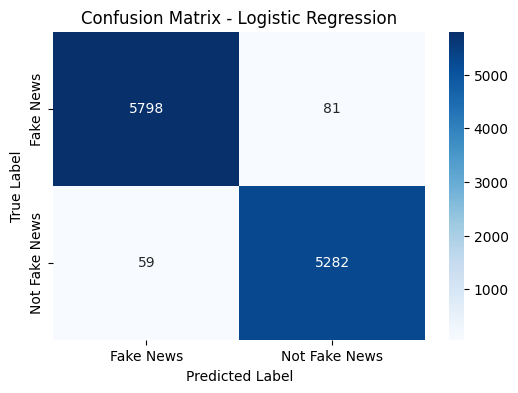

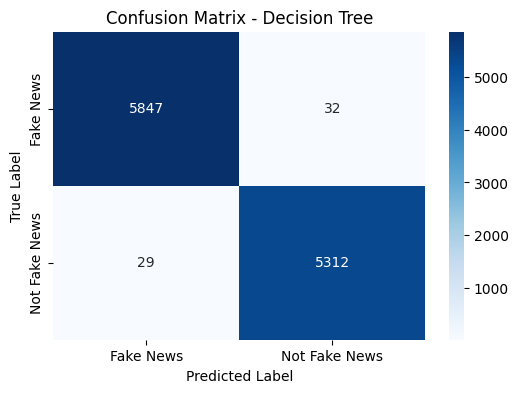

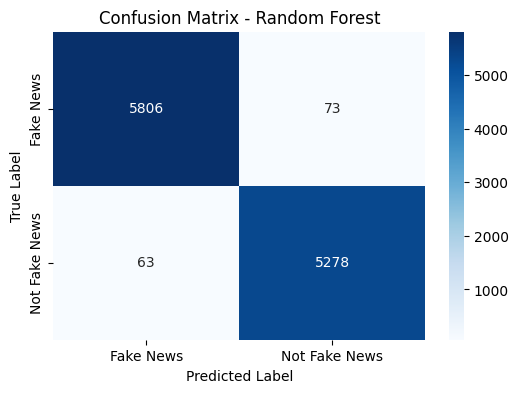

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake News', 'Not Fake News'], yticklabels=['Fake News', 'Not Fake News'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(y_test, pred_lr, "Logistic Regression")
plot_confusion_matrix(y_test, pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, pred_rf, "Random Forest")


<ipython-input-54-95a924bc4746>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


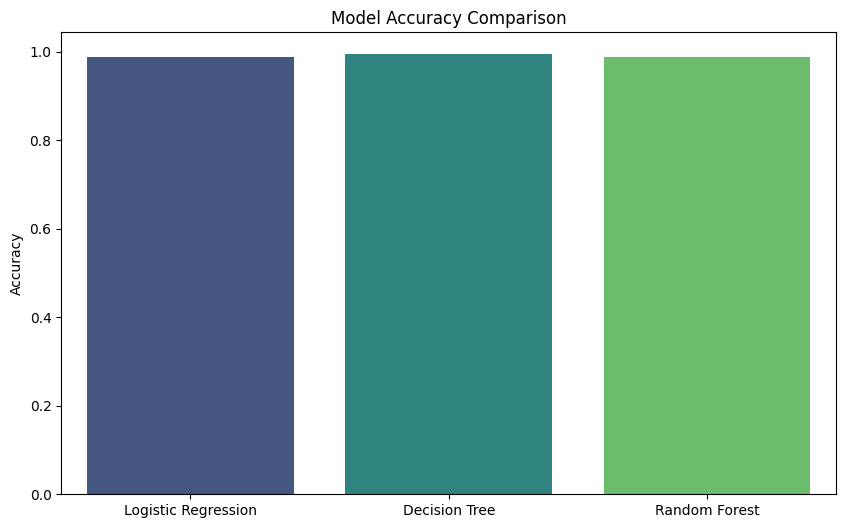

In [54]:
# Creating a bar plot to compare accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [
    LR.score(xv_test, y_test),
    DT.score(xv_test, y_test),
    RF.score(xv_test, y_test)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()
